<a href="https://colab.research.google.com/github/CarolyneS14/Crimes_SP_2019_2020/blob/main/Base_Crimes_SP_Endere%C3%A7os_Delegacias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

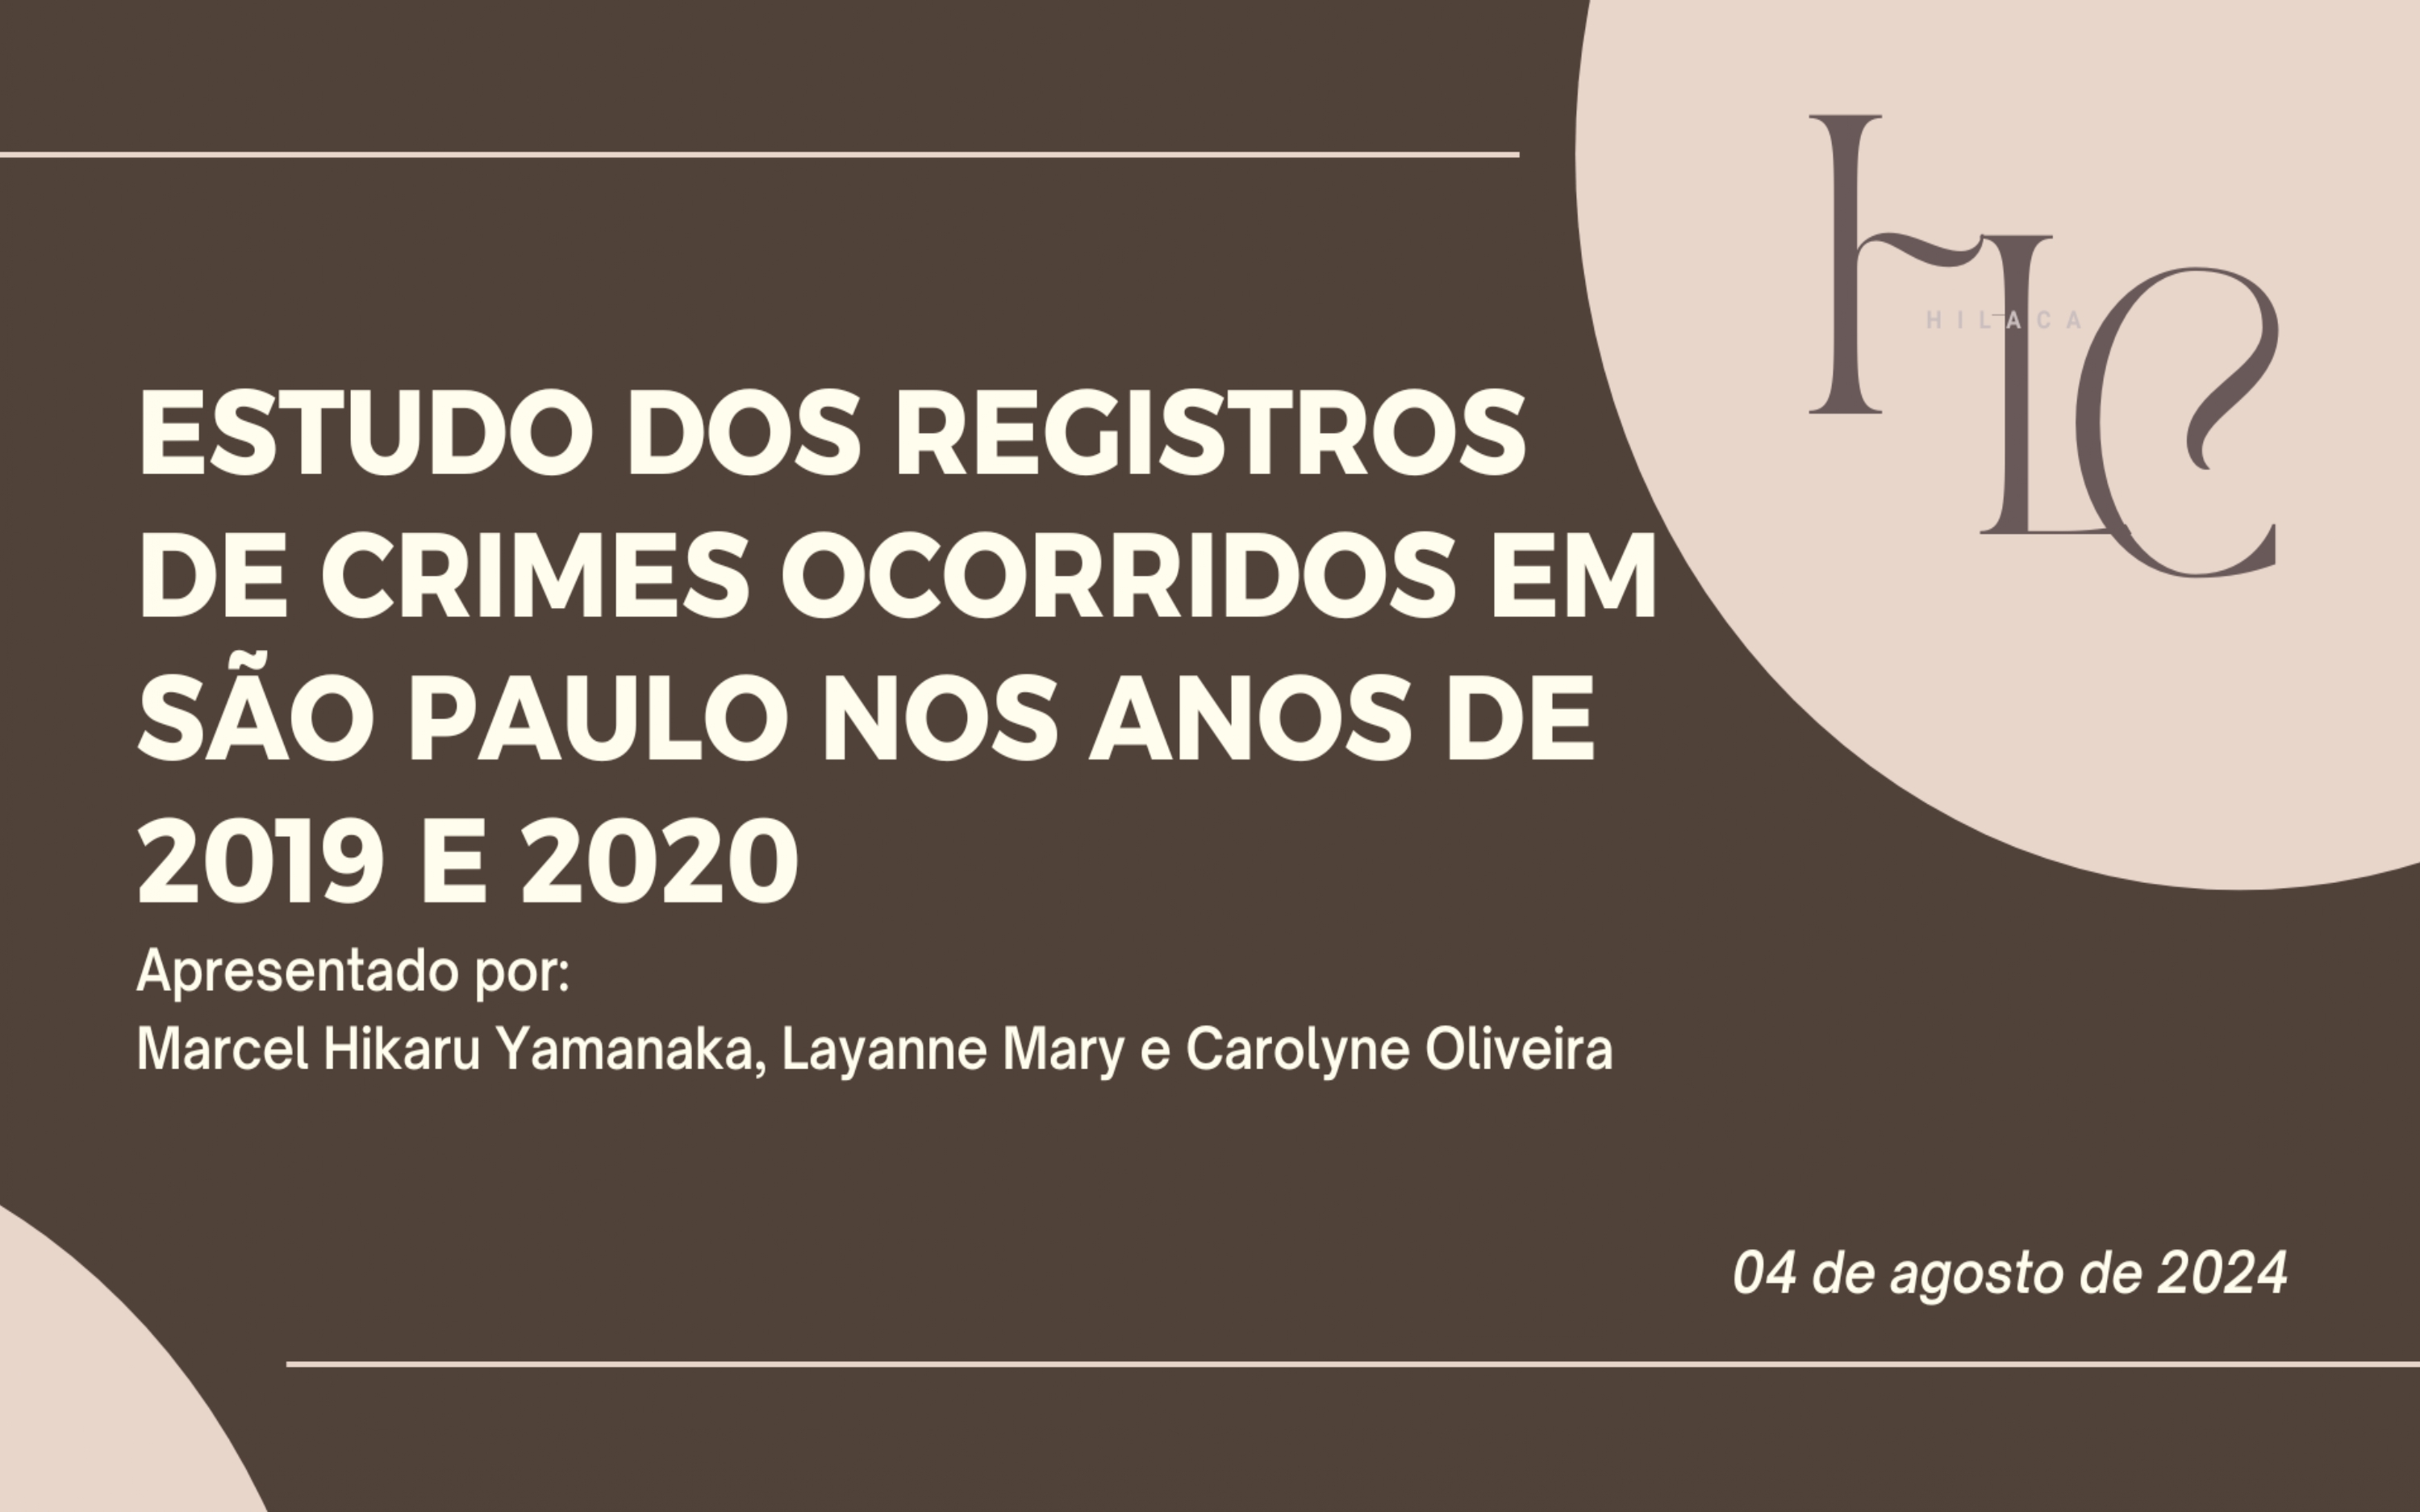

In [1]:
import pandas as pd

In [2]:
!pip install --upgrade google-cloud-bigquery

In [3]:
from google.colab import auth
auth.authenticate_user()

In [4]:
from google.cloud import bigquery
client = bigquery.Client(project='crimessp')

In [5]:
from google.colab import files

# Consultando base de dados

In [6]:
query = """
SELECT *
FROM `crimessp.2019e2020.base_crimes_Qtd_por_Delegacia`
"""
query_job = client.query(query)

# Converter os resultados em um DataFrame do Pandas
df = query_job.to_dataframe()
print(df.head())

     Delegacia   Ano                  Crime  Quantidade
0  001 DP - Sé  2019                Estupro          10
1  001 DP - Sé  2019  Estupro_de_vulneravel           8
2  001 DP - Sé  2019       Furto_de_veiculo         142
3  001 DP - Sé  2019                 Furtos       12997
4  001 DP - Sé  2019      Homicidio_Culposo           0


In [7]:
# Exibir os nomes das colunas para garantir que estamos usando o nome correto
print(df.columns)

Index(['Delegacia', 'Ano', 'Crime', 'Quantidade'], dtype='object')


In [8]:
# Listar todas as delegacias presentes no arquivo
delegacias = df['Delegacia'].unique()
print(delegacias)

['001 DP - Sé' '002 DP - Bom Retiro' '003 DP - Campos Elísios'
 '004 DP - Consolação' '005 DP - Aclimação' '006 DP - Cambuci'
 '007 DP - Lapa' '008 DP - Brás' '009 DP - Carandiru'
 '01 DP Pessoa com Deficiência' '010 DP - Penha de França'
 '011 DP - Santo Amaro' '012 DP - Pari' '013 DP - Casa Verde'
 '014 DP - Pinheiros' '015 DP - Itaim Bibi' '016 DP - Vila Clementino'
 '017 DP - Ipiranga' '018 DP - Alto da Moóca' '019 DP - Vila Maria'
 '020 DP - Água Fria' '021 DP - Vila Matilde'
 '022 DP - São Miguel Paulista' '023 DP - Perdizes' '024 DP - Ponte Rasa'
 '025 DP - Parelheiros' '026 DP - Sacomã' '027 DP - Campo Belo'
 '028 DP - Freguesia do Ó' '029 DP - Vila Diva' '030 DP - Tatuapé'
 '031 DP - Vila Carrão' '032 DP - Itaquera' '033 DP - Pirituba'
 '034 DP - Vila Sonia' '035 DP - Jabaquara' '036 DP - Vila Mariana'
 '037 DP - Campo Limpo' '038 DP - Vila Amália' '039 DP - Vila Gustavo'
 '040 DP - Vila Santa Maria' '041 DP - Vila Rica'
 '042 DP - Parque São Lucas' '043 DP - Cidade Ademar'
 '

In [9]:
# Criar um dicionário para mapear as delegacias para seus endereços
enderecos_delegacias = {
    'Delegacia do Idoso - 7ª Seccional - Itaquera': 'Av. Itaquera, 1340, São Paulo, SP',
    '063 DP - Vila Jacuí': 'R. Fernandes da Cunha, 123, São Paulo, SP',
    '001 DP - Sé': 'Pça. Alfredo Issa, 57, São Paulo, SP',
    '007 DP - Brás': 'Rua do Brás, 361, São Paulo, SP',
    '015 DP - Itaim Bibi': 'Rua Dr. Guilherme Bannitz, 89, São Paulo, SP',
    '029 DP - Vila Diva': 'Rua Miguel Rachid, 153, São Paulo, SP',
    '050 DP - Itaim Paulista': 'Rua Ken Sugaya, 532, São Paulo, SP',
    '095 DP - Heliópolis': 'Rua da Coroa, 41, São Paulo, SP',
    '7ª DDM - 7ª Seccional - Itaquera': 'Av. Itaquera, 1450, São Paulo, SP',
    'Del. Aeroporto Int. SP - Guarulhos (SP)': 'Aeroporto Internacional de Guarulhos, São Paulo, SP',
    '045 DP - Vila Brasilândia': 'R. Parapuã, 1827, São Paulo, SP',
    '053 DP - Parque do Carmo': 'Rua Evangelina, 1992, São Paulo, SP',
    'Del. Aeroporto Int. Viracopos - CPS (SP)': 'Aeroporto Internacional de Viracopos, Campinas, SP',
    'Delegacia Porto de Santos (SP)': 'Porto de Santos, Santos, SP',
    '028 DP - Freguesia do Ó': 'R. Bonifácio Cubas, 103, São Paulo, SP',
    '030 DP - Tatuapé': 'Rua Coelho Lisboa, 432, São Paulo, SP',
    '016 DP - Vila Clementino': 'R. Estado de Israel, 777, São Paulo, SP',
    '068 DP - Lajeado': 'R. Boipeva, 164, São Paulo, SP',
    '089 DP - Portal do Morumbi': 'Av. Giovanni Gronchi, 5730, São Paulo, SP',
    '101 DP - Jardim das Imbuias': 'Av. Sen. Teotônio Vilela, 2200, São Paulo, SP',
    '6ª DDM - 6ª Seccional - Santo Amaro': 'Av. Santo Amaro, 7913, São Paulo, SP',
    '092 DP - Parque Santo Antônio': 'R. Padre José Garzotti, 157, São Paulo, SP',
    'Del. Aeroporto SP - Congonhas': 'Aeroporto de Congonhas, São Paulo, SP',
    '027 DP - Campo Belo': 'Rua Demóstenes, 601, São Paulo, SP',
    '040 DP - Vila Santa Maria': 'R. Altinópolis, 253, São Paulo, SP',
    '007 DP - Lapa': 'R. Albion, 320, São Paulo, SP',
    '049 DP - São Mateus': 'R. Forte do Araxá, 200, São Paulo, SP',
    '058 DP - Vila Formosa': 'Rua Américo Gomes da Costa, 208, São Paulo, SP',
    'Delegacia do Idoso - 8ª Seccional - São Mateus': 'Av. Mateo Bei, 1885, São Paulo, SP',
    '023 DP - Perdizes': 'Rua Apiacás, 190, São Paulo, SP',
    '039 DP - Vila Gustavo': 'Rua Major Dantas Cortez, 246, São Paulo, SP',
    'Delegacia de Proteção ao Idoso - 1ª Seccional - Centro': 'R. do Carmo, 98, São Paulo, SP',
    'Delegacia do Idoso - 3ª Seccional - Oeste': 'R. Cardeal Arcoverde, 2306, São Paulo, SP',
    '099 DP - Campo Grande': 'R. do Mirante, 118, São Paulo, SP',
    '103 DP - Cohab Itaquera': 'Rua Virgínia Ferni, 400, São Paulo, SP',
    '048 DP - Cidade Dutra': 'Rua Apuá, 439, São Paulo, SP',
    '055 DP - Parque São Rafael': 'R. Muniz de Souza, 383, São Paulo, SP',
    '9ª DDM - 3ª Seccional - Oeste': 'Av. Dr. Arnaldo, 141, São Paulo, SP',
    '042 DP - Parque São Lucas': 'R. Ken Sugaya, 678, São Paulo, SP',
    '091 DP - Ceagesp': 'Av. Dr. Gastão Vidigal, 1946, São Paulo, SP',
    'Central de Flagrantes II - 91 DP': 'Rua João Boemer, 1055, São Paulo, SP',
    '002 DP - Bom Retiro': 'Rua Anhaia, 151, São Paulo, SP',
    '036 DP - Vila Mariana': 'R. Sebastião Afonso, 194, São Paulo, SP',
    'Delegacia do Idoso - 2ª Seccional - Sul': 'Rua João Moura, 101, São Paulo, SP',
    '038 DP - Vila Amália': 'Rua Miguel Gonçalves Correia, 320, São Paulo, SP',
    '021 DP - Vila Matilde': 'Rua Dr. Aureliano Barreiros, 19, São Paulo, SP',
    '059 DP - Jardim Noemia': 'Rua Paulo de Avelar, 104, São Paulo, SP',
    '069 DP - Teotônio Vilela': 'Av. Senador Teotônio Vilela, 3500, São Paulo, SP',
    '075 DP - Jardim Arpoador': 'Rua Deputado João Sussumu Hirata, 62, São Paulo, SP',
    '044 DP - Guaianazes': 'Rua Salvador Gianetti, 2282, São Paulo, SP',
    '081 DP - Belém': 'Rua Siqueira Bueno, 2166, São Paulo, SP',
    '003 DP - Campos Elísios': 'Alameda Nothmann, 218, São Paulo, SP',
    '067 DP - Jardim Robru': 'Rua São Gonçalo do Rio das Pedras, 100, São Paulo, SP',
    '093 DP - Jaguaré': 'Avenida Presidente Altino, 2310, São Paulo, SP',
    '035 DP - Jabaquara': 'Avenida Engenheiro Armando de Arruda Pereira, 2350, São Paulo, SP',
    '041 DP - Vila Rica': 'Rua Nossa Senhora do Ó, 1100, São Paulo, SP',
    '054 DP - Cidade Tiradentes': 'Rua Sarah Kubitschek, 105, São Paulo, SP',
    '032 DP - Itaquera': 'Rua Sabbado D`Angelo, 43, São Paulo, SP',
    'Delegacia do Idoso - 6ª Seccional - Santo Amaro': 'Avenida Santo Amaro, 7800, São Paulo, SP',
    '025 DP - Parelheiros': 'Rua Sadamu Inoue, 5252, São Paulo, SP',
    '034 DP - Vila Sonia': 'Rua Alvarenga, 4224, São Paulo, SP',
    '1ª DDM - 1ª Seccional - Centro': 'Rua Dr. Jorge Miranda, 155, São Paulo, SP',
    '004 DP - Consolação': 'Rua da Consolação, 247, São Paulo, SP',
    '017 DP - Ipiranga': 'Rua Clímaco Barbosa, 58, São Paulo, SP',
    '102 DP - Socorro': 'Rua Cassiano dos Santos, 182, São Paulo, SP',
    'Delegacia do Idoso - 4ª Seccional - Norte': 'Rua Darzan, 31, São Paulo, SP',
    '010 DP - Penha de França': 'Rua Dr. João Ribeiro, 398, São Paulo, SP',
    '085 DP - Jardim Mirna': 'Rua Bento Gonçalves, 945, São Paulo, SP',
    '052 DP - Parque São Jorge': 'Rua Dr. Clementino, 325, São Paulo, SP',
    '012 DP - Pari': 'Rua Rio Bonito, 1313, São Paulo, SP',
    '043 DP - Cidade Ademar': 'Rua Maria Cuofono Salzano, 311, São Paulo, SP',
    '01 DP Pessoa com Deficiência': 'Rua Brigadeiro Tobias, 527, São Paulo, SP',
    '005 DP - Aclimação': 'Rua Muniz de Souza, 614, São Paulo, SP',
    '024 DP - Ponte Rasa': 'Rua Heloísa Pamplona, 268, São Paulo, SP',
    '014 DP - Pinheiros': 'Rua Deputado Lacerda Franco, 335, São Paulo, SP',
    '019 DP - Vila Maria': 'Rua Juruá, 201, São Paulo, SP',
    '051 DP - Butantã': 'Rua Pereira do Lago, 51, São Paulo, SP',
    '074 DP - Jaraguá': 'Rua Maria Amália Lopes de Azevedo, 301, São Paulo, SP',
    '5ª DDM - 5ª Seccional - Leste': 'Rua Sapopemba, 3740, São Paulo, SP',
    '064 DP - Cidade A E Carvalho': 'Rua Álvaro Guimarães, 141, São Paulo, SP',
    '066 DP - Vale do Aricanduva': 'Rua Armando Pimentel, 200, São Paulo, SP',
    '073 DP - Jaçanã': 'Rua João Afonso, 342, São Paulo, SP',
    '083 DP - Parque Bristol': 'Rua Solene, 520, São Paulo, SP',
    '8ª DDM - 8ª Seccional São Mateus': 'Rua Pio XI, 2200, São Paulo, SP',
    'DELPOL Metropolitano': 'Rua das Monções, 1245, São Paulo, SP',
    '008 DP - Brás': 'Rua do Brás, 361, São Paulo, SP',
    '015 DP - Itaim Bibi': 'Rua Dario Pimentel, 1980, São Paulo, SP',
    '029 DP - Vila Diva': 'Rua Teodoro Sampaio, 1564, São Paulo, SP',
    '050 DP - Itaim Paulista': 'Rua do Itaim Paulista, 731, São Paulo, SP',
    '070 DP - Vila Ema': 'Rua São Caetano, 1005, São Paulo, SP',
    '006 DP - Cambuci': 'Rua Marcílio Dias, 146, São Paulo, SP',
    '098 DP - Jardim Míriam': 'Rua Mário Júnior, 785, São Paulo, SP',
    '018 DP - Alto da Moóca': 'Rua Da Moóca, 2012, São Paulo, SP',
    '026 DP - Sacomã': 'Rua Fernandes Pimentel, 600, São Paulo, SP',
    '077 DP - Santa Cecília': 'Rua Piauí, 156, São Paulo, SP',
    '022 DP - São Miguel Paulista': 'Rua São Miguel, 181, São Paulo, SP',
    '056 DP - Vila Alpina': 'Rua do Tabor, 142, São Paulo, SP',
    '078 DP - Jardins': 'Rua dos Jardins, 987, São Paulo, SP',
    '2ª DDM - 2ª Seccional - Sul': 'Rua Abilio Soares, 1000, São Paulo, SP',
    'OUTRAS ESPECIALIZADAS': 'Rua Dr. Barros Júnior, 197, São Paulo, SP',
    '011 DP - Santo Amaro': 'Rua Adolfo Pinheiro, 501, São Paulo, SP',
    '4ª DDM - 4ª Seccional - Norte': 'Rua Doutor Arnaldo, 270, São Paulo, SP',
    '047 DP - Capão Redondo': 'Rua Dr. José de Barros, 1050, São Paulo, SP',
    '062 DP - Ermelino Matarazzo': 'Rua Domingos Criscio, 256, São Paulo, SP',
    '096 DP - Monções': 'Rua João Pedro, 1391, São Paulo, SP',
    '037 DP - Campo Limpo': 'Rua Demóstenes, 187, São Paulo, SP',
    '057 DP - Parque da Moóca': 'Rua Apiaí, 546, São Paulo, SP',
    '046 DP - Perus': 'Rua Rodrigues dos Santos, 1011, São Paulo, SP',
    '065 DP - Artur Alvim': 'Rua Vicente de Carvalho, 1823, São Paulo, SP',
    '100 DP - Jardim Herculano': 'Rua Aracaju, 442, São Paulo, SP',
    '3ª DDM - 3ª Seccional - Oeste': 'Rua Dona Adma Jafet, 1010, São Paulo, SP',
    'Delegacia do Idoso - 5ª Seccional - Leste': 'Rua Sampaio Vidal, 1234, São Paulo, SP',
    '013 DP - Casa Verde': 'Rua Isidoro de Souza, 752, São Paulo, SP',
    '033 DP - Pirituba': 'Rua Arthur de Azevedo, 1524, São Paulo, SP',
    'Del. Pol. Atendimento ao Turista': 'Rua dos Três Irmãos, 245, São Paulo, SP',
    '009 DP - Carandiru': 'Rua Isidoro de Souza, 295, São Paulo, SP',
    '031 DP - Vila Carrão': 'Rua Cândido Rodrigues, 723, São Paulo, SP',
    '080 DP - Vila Joaniza': 'Rua Vila Joaniza, 876, São Paulo, SP',
    '097 DP - Americanópolis': 'Rua Palmira, 1015, São Paulo, SP',
    '020 DP - Água Fria': 'Rua Francisco de Morais, 678, São Paulo, SP',
    '072 DP - Vila Penteado': 'Rua Ilha Bela, 432, São Paulo, SP',
    '090 DP - Parque Novo Mundo': 'Rua João Maria, 1597, São Paulo, SP',
    '087 DP - Vila Pereira Barreto': 'Rua das Flores, 879, São Paulo, SP',
}


In [10]:
# Aplicar o mapeamento à coluna "Endereço"
df['Endereco'] = df['Delegacia'].map(enderecos_delegacias)

In [11]:
# Mostrar as primeiras linhas do DataFrame para verificar
print(df.head())

     Delegacia   Ano                  Crime  Quantidade  \
0  001 DP - Sé  2019                Estupro          10   
1  001 DP - Sé  2019  Estupro_de_vulneravel           8   
2  001 DP - Sé  2019       Furto_de_veiculo         142   
3  001 DP - Sé  2019                 Furtos       12997   
4  001 DP - Sé  2019      Homicidio_Culposo           0   

                               Endereco  
0  Pça. Alfredo Issa, 57, São Paulo, SP  
1  Pça. Alfredo Issa, 57, São Paulo, SP  
2  Pça. Alfredo Issa, 57, São Paulo, SP  
3  Pça. Alfredo Issa, 57, São Paulo, SP  
4  Pça. Alfredo Issa, 57, São Paulo, SP  


In [12]:
# Salvar o arquivo CSV atualizado
output_file_path = '/content/base_crimes_Qtd_por_Delegacia.csv'
df.to_csv(output_file_path, index=False)

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Delegacia   4046 non-null   object
 1   Ano         4046 non-null   Int64 
 2   Crime       4046 non-null   object
 3   Quantidade  4046 non-null   Int64 
 4   Endereco    4012 non-null   object
dtypes: Int64(2), object(3)
memory usage: 166.1+ KB
None


In [14]:
# Baixar o arquivo CSV
files.download('base_crimes_Qtd_por_Delegacia.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>